# Trabalho 7: Treinamento de uma RNA feedforward MLP com uma camada escondida

**Projetar uma rede neural feedforward com uma camada escondida para modelar os dados disponíveis no arquivo "Trabalho6dados.xlsx"**

**1- Separar os dados em conjuntos de treinamento, validação e teste;**

**2- Utilizar backpropagation por Levenberg-Marquardt para treinar os pesos da RNA;**

**3- Utilizar o Early Stopping como critério de parada para evitar overtraining;**

**4- Utilizar coeficiente de determinação ou coeficiente de correlação para avaliar overfitting.**

**Apresentar gráficos relativos ao MSE de treinamento, validação (early stopping) e teste e os coeficientes de determinação ou correlação para todos os dados e para os dados de teste.**
**Apresentar os resultados para a melhor rede, mas também para outras redes com diferentes números de neurônios na camada escondida.**


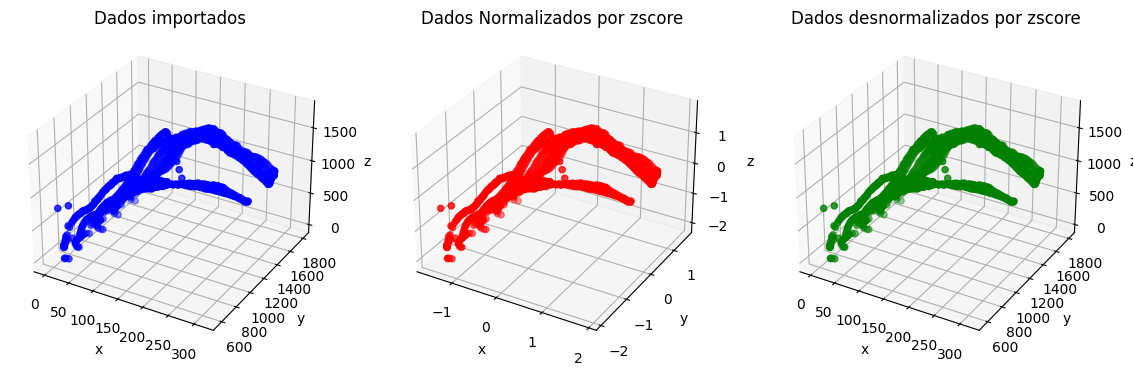

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np


def GetData():
  df = pd.read_excel("./Trabalho6dados.xlsx")
  x1 = df['x0']
  x2 = df['x1']
  y = df['y']
  return([x1, x2, y])

def ZScore(Data):
  return ((Data - np.mean(Data)) / np.std(Data))

def DenormalizeData(Data, Orig):
  return (Data * Orig.std() + Orig.mean())

def GetNormData():
  x = GetData()
  for i in range(len(x)):
    x[i] = ZScore(x[i])
  return (x)

# @brief: plota os dados importados
def PlotData(fig):
  x, y, z = GetData()
  ax = fig.add_subplot(1, 3, 1, projection='3d')
  ax.scatter(x, y, z, c='blue', marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados importados")
  return (ax)

def PlotNormalizedData(fig, pos, label, color):
  xNorm, yNorm, zNorm = GetNormData()
  ax = fig.add_subplot(1, 3, pos, projection='3d')
  ax.scatter(xNorm, yNorm, zNorm, c=color, marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados Normalizados por " + label)

def PlotDenormalizedData(fig, pos, label, color):
  xNorm, yNorm, zNorm = GetNormData()
  x, y, z = GetData()
  xDenorm, yDenorm, zDenorm = DenormalizeData(xNorm, x), DenormalizeData(yNorm, y), DenormalizeData(zNorm, z)
  ax = fig.add_subplot(1, 3, pos, projection='3d')
  ax.scatter(xDenorm, yDenorm, zDenorm, c=color, marker='o')
  ConfGraph3D(ax, 'x', 'y', 'z', "Dados desnormalizados por " + label)
  return (xNorm, yNorm)

def ConfGraph3D(ax, x, y, z, title):
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(title)

def PlotFigure():
  fig = plt.figure(figsize=(14, 7))
  PlotData(fig)
  PlotNormalizedData(fig, 2, 'zscore', 'red')
  PlotDenormalizedData(fig, 3, 'zscore', 'green')

PlotFigure()

In [10]:
from sklearn.model_selection import train_test_split

x1, x2, y = GetNormData()
X = np.vstack([x1, x2]).T
Y = np.array(y)
# Separando os dados em conjuntos de treinamento (70%), validação (15%) e teste (15%)
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
x1, x2, y = GetData()
X_orig = np.vstack([x1, x2]).T
Y_orig = np.array(y)
x_train_orig, x_temp_orig, y_train_orig, y_temp_orig = train_test_split(X_orig, Y_orig, test_size=0.3, random_state=42)
x_val_orig, x_test_orig, y_val_orig, y_test_orig = train_test_split(x_temp_orig, y_temp_orig, test_size=0.5, random_state=42)

In [12]:
from keras.models import Sequential
from keras.layers import Dense

# Criando arquitetura da rede neural:
modelo = Sequential()
modelo.add(Dense(units=2, activation='tanh', input_dim=x_train.shape[1]))
modelo.add(Dense(units=1, activation='linear'))

# Treinando a rede neural:
modelo.compile(loss='mse', optimizer='SGD', metrics=['mse'])
resultado = modelo.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

2023-10-10 16:14:50.356494: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-10 16:14:50.470970: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-10 16:14:50.471055: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-10 16:14:50.471122: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-10 16:14:50.485819: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-10 16:14:50.487359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/200
27/27 [==============================] - 2s 20ms/step - loss: 0.7195 - mse: 0.7195 - val_loss: 0.6064 - val_mse: 0.6064
Epoch 2/200
27/27 [==============================] - 0s 14ms/step - loss: 0.5379 - mse: 0.5379 - val_loss: 0.4772 - val_mse: 0.4772
Epoch 3/200
27/27 [==============================] - 0s 15ms/step - loss: 0.4560 - mse: 0.4560 - val_loss: 0.4205 - val_mse: 0.4205
Epoch 4/200
27/27 [==============================] - 0s 14ms/step - loss: 0.4160 - mse: 0.4160 - val_loss: 0.3872 - val_mse: 0.3872
Epoch 5/200
27/27 [==============================] - 0s 12ms/step - loss: 0.3906 - mse: 0.3906 - val_loss: 0.3652 - val_mse: 0.3652
Epoch 6/200
27/27 [==============================] - 0s 13ms/step - loss: 0.3713 - mse: 0.3713 - val_loss: 0.3447 - val_mse: 0.3447
Epoch 7/200
27/27 [==============================] - 0s 11ms/step - loss: 0.3530 - mse: 0.3530 - val_loss: 0.3270 - val_mse: 0.3270
Epoch 8/200
27/27 [==============================] - 0s 10ms/step - loss: 0.

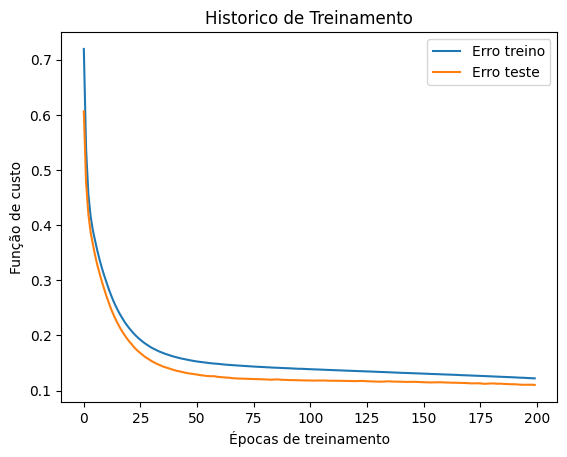

In [13]:
import matplotlib.pyplot as plt

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Historico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

6/6 [==============================] - 0s 3ms/step


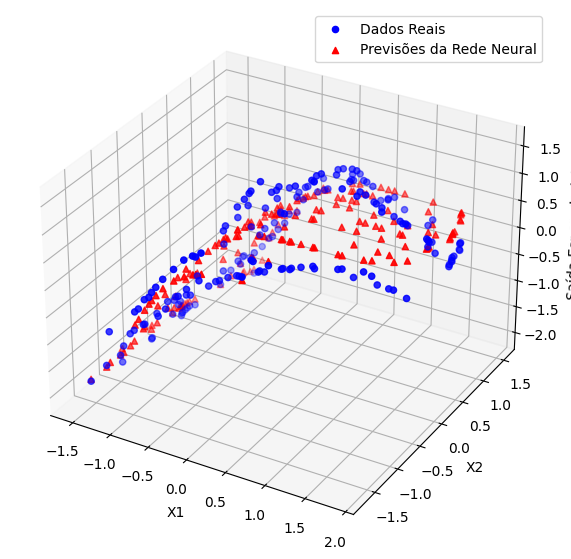

In [14]:
fig = plt.figure(figsize=(14, 7))
y_pred = modelo.predict(x_test)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, c='blue', marker='o', label='Dados Reais')
ax.scatter(x_test[:, 0], x_test[:, 1], y_pred, c='red', marker='^', label='Previsões da Rede Neural')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Saída Esperada (y)')
ax.legend()